This Jupyter Notebook will analyse the question of whether there is a link between number of ratings and average rating along with their respective genres. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import functions
df_metadata = functions.get_data()

With the metadata collected and the unnecessary columns removed, the first hypothesis that will be tested: Is there a correlation between the number of reviews and the average rating of a book?

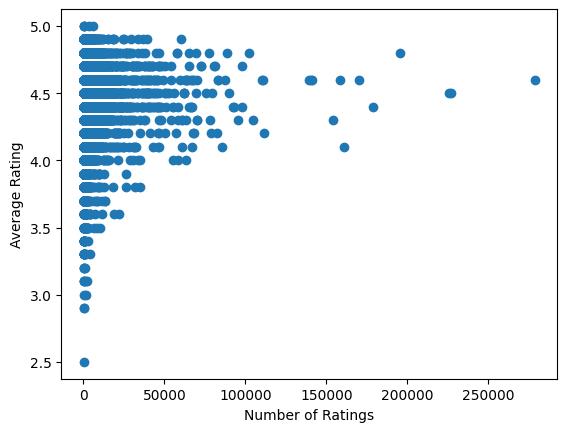

In [ ]:
X = df_metadata['rating_number'].values
Y = df_metadata['average_rating'].values

plt.scatter(X,Y)
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

No clear correlation, most of the data is skewed to the top in niche markets.

Hypothesis #2: Comparing the page count against the price of the books in the dataset:

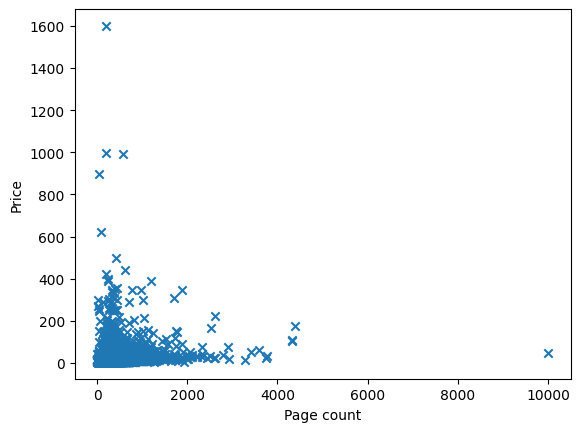

In [8]:
page_count = df_metadata['page_count'].dropna()
price = df_metadata['price_numeric'][page_count.index]
plt.scatter(page_count, price, marker = 'x')
plt.xlabel('Page count')
plt.ylabel('Price')
plt.show()

Again, no clear correlations between Page count and price.

Hypothesis #3: Does an average rating correlate to a higher price? E.g. better quality = higher price

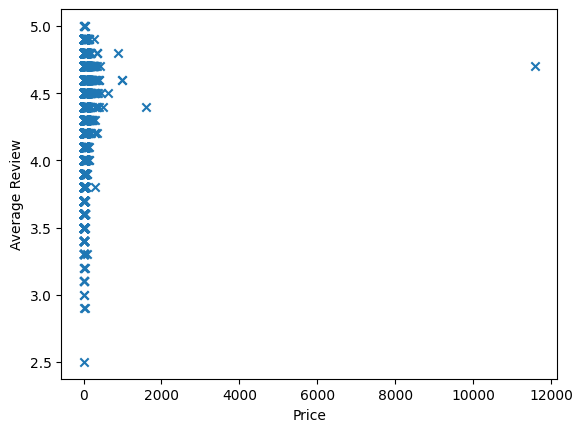

In [12]:
price = df_metadata['price_numeric']
reviews = df_metadata['average_rating']
plt.scatter(price,reviews , marker = 'x')
plt.xlabel('Price')
plt.ylabel('Average Review')
plt.show()

No linear correlation between to the two variables.

Seeing as there were no correlations between the variables that were chosen for analysis, a clustering alorithm will be used to see whether there is a correlation between average rating, number of reviews and numeric price.